In [1]:
import logging
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append('../scripts')
from logger import *
from preprocessing import load_data, check_missing_values, remove_duplicates, convert_date_column
from analysis import plot_sales_distribution, plot_monthly_sales, plot_promo_sales

In [2]:
# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger('EDA_Logger')


In [3]:
# Load data
logger.info('Loading datasets...')
train_data, test_data = load_data('../data/train.csv', '../data/test.csv')
store_data = pd.read_csv('../data/store.csv')
logger.info('Datasets loaded successfully.')

Data loaded successfully.


e:\10 Academy\Rossmann-Sales-Forecast\notebooks\../scripts\preprocessing.py:20: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(train_file)


In [4]:
# Initial
logger.info('Inspecting training data...')
print(train_data.head())
print(train_data.info())

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 n

In [5]:
# Check for missing values
missing_values_train = check_missing_values(train_data)
print("Missing values in training data:")
print(missing_values_train)

Missing values in training data:
Series([], dtype: int64)


In [6]:
logger.info('Handling missing values...')
train_data.fillna(0, inplace=True)  # Fill numerical columns with 0
train_data.fillna('0', inplace=True)

In [7]:
train_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [8]:
# Merge 
logger.info('Merging training data with store data...')
train_data = train_data.merge(store_data, left_on='Store', right_on='Store', how='left')  # Adjust right_on based on actual store_data
logger.info('Merge completed. New shape of training data: {}'.format(train_data.shape))

In [9]:
# Remove duplicates
logger.info('Removing duplicates...')
initial_shape = train_data.shape
train_data = remove_duplicates(train_data)
logger.info(f'Removed duplicates. Shape changed from {initial_shape} to {train_data.shape}.')

Removed 0 duplicate rows.


In [10]:
# Convert date column
logger.info('Converting date column...')
train_data = convert_date_column(train_data, 'Date')


Column 'Date' converted to datetime.


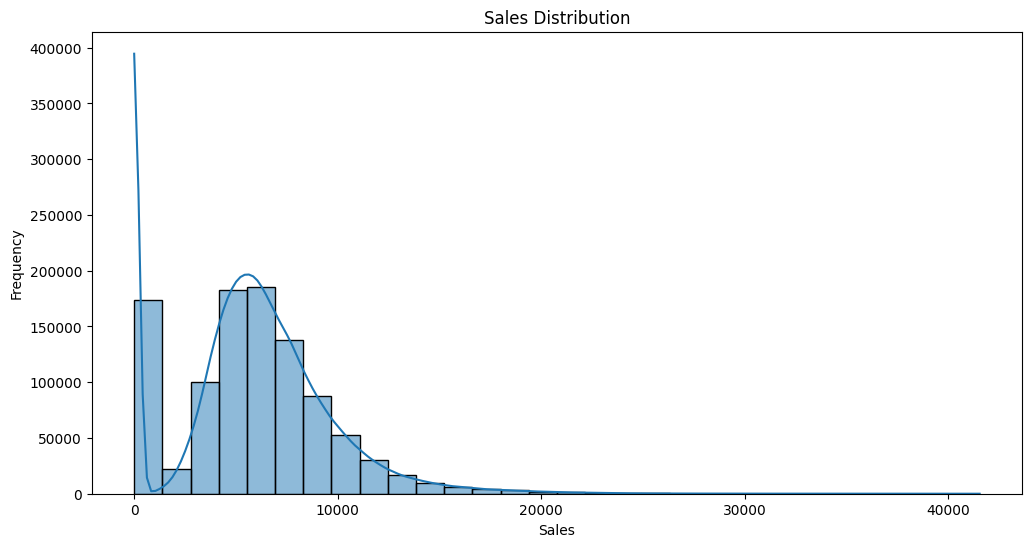

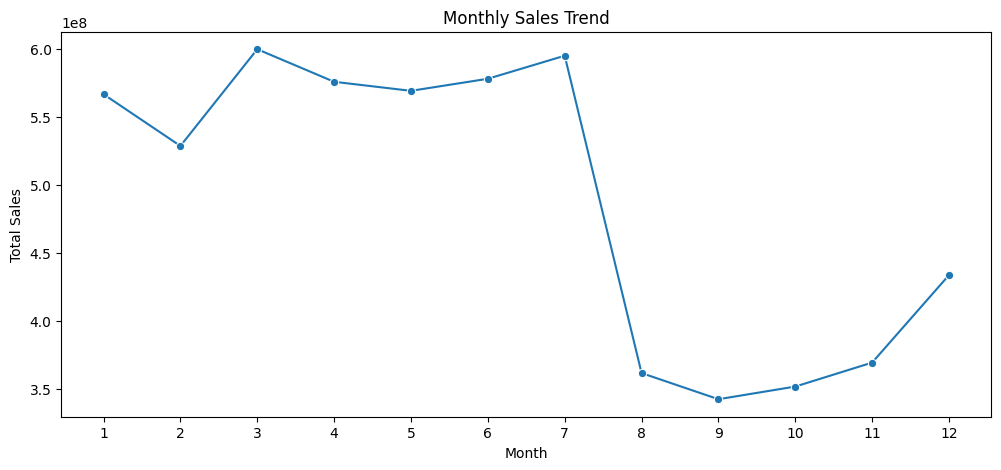

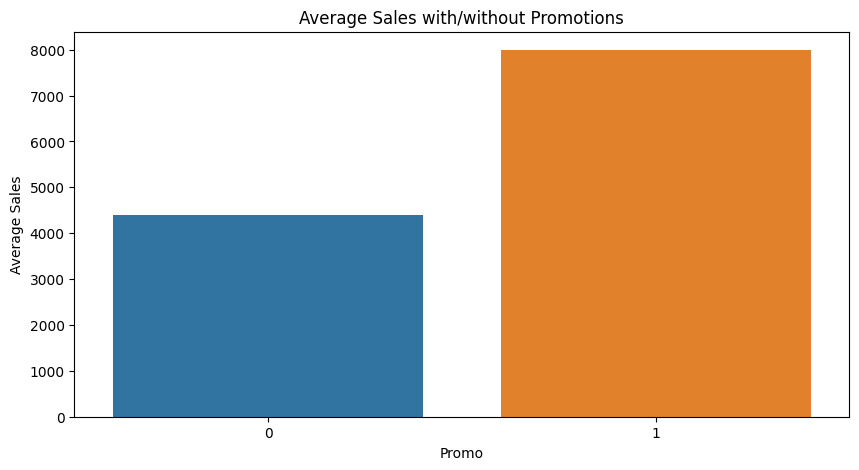

In [12]:
# Exploratory Data Analysis
logger.info('Analyzing sales distribution by promo status...')
plot_sales_distribution(train_data)
plot_monthly_sales(train_data)
plot_promo_sales(train_data)

plt.show() 

logger.info('Exploratory analysis completed.')